In [1]:
import numpy as np
import matplotlib.pyplot as plt
from coeffs import *
from numpy import linalg as LA

In [2]:
len = 12000
theta = np.linspace(-5,5,len)

In [3]:
#given eccentricity equation 9e^2 -18e^2+5
a = 9; b = -18; c=5 
e1 = (-b+np.sqrt(b**2-4*a*c))/(2*a); e2 = (-b-np.sqrt(b**2-4*a*c))/(2*a) # neglect e2 because e2<1
S = np.array([5,0]) #given focus s = (5 0)^T
a = S[0]/e1  # focus s = (ae,0)
#print(a)
b = np.sqrt(np.power(a,2)*(np.power(e1,2)-1)) # using Eccentricity formula
#print("b ",b)

In [4]:
# we can form
#Eqn : x.T@V@x = F
V = np.array(([np.power(b,2),0],[0,-np.power(a,2)]))
F = 144


In [5]:
eigval,eigvec = LA.eig(V)
#print(eigval)
#print(eigvec)

D = np.diag(eigval)
P = eigvec
#print("D=\n",D)
#print("P=\n",P)


In [6]:
#Standard hyperbola : y.T@D@y=1
y1 = np.linspace(-1,1,len)
y2 = np.sqrt((1-D[0,0]*np.power(y1,2))/(D[1,1]))
y3 = -1*np.sqrt((1-D[0,0]*np.power(y1,2))/(D[1,1]))
y = np.hstack((np.vstack((y1,y2)),np.vstack((y1,y3))))
n = np.array([5,0])
c = 9
A = np.array([c/n[0],15])
B = np.array([c/n[0],-15])
X_AB = line_gen(A,B)

/home/suresh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/home/suresh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


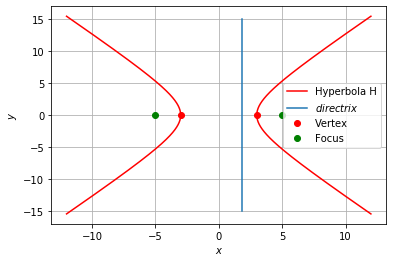

In [7]:
#Affine Transformation
#Equation : y = P.T@(x-c)/(K**0.5)
x = (P @ (y)) * F**0.5

#Plotting required hyperbola
plt.plot(x[0,:len],x[1,:len],color='r',label='Hyperbola H')
plt.plot(x[0,len+1:],x[1,len+1:],color='r')
plt.plot(X_AB[0,:],X_AB[1,:],label='$directrix$')
plt.plot(a,0,'o',color='r',label='Vertex')
plt.plot(-a,0,'o',color='r')
plt.plot(S[0],S[1],'o',color='g',label='Focus')
plt.plot(-S[0],S[1],'o',color='g')
#ax.plot()
plt.xlabel('$x$');plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()
plt.show()

In [42]:
print("b^2-a^2 = ",np.power(b,2)-np.power(a,2))

b^2-a^2 =  7.0
